# BRI Data Hackathon - People Analytics  
https://www.kaggle.com/c/bri-data-hackathon-pa

## 1 Loading data  


In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'data/'
df = pd.read_csv(path + 'train.csv')
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [3]:
print('The shape of dataframe: ', df.shape)

The shape of dataframe:  (11153, 22)


In [4]:
df['Best Performance'].value_counts()

0    9516
1    1637
Name: Best Performance, dtype: int64

Quick overview: 
- The training set has 11,153 entries with 22 columns (features). 
- The target class, i.e. ``Best Performance`` column, is not balance.  

Next, check if there are null values:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

``Last_achievement_%`` and ``Achievement_above_100%_during3quartal`` has 1 *null* value each.  
Removing 1 particular entry with missing value should not affect the quality of the data significantly.

In [6]:
# seach missing values index
print('Null value for last achievement % is located at index: {}'.format(df['Last_achievement_%'][df['Last_achievement_%'].isnull()].index))
print('Null value for Achievement_above_100%_during3quartal is located at index: {}'.format(df['Achievement_above_100%_during3quartal'][df['Achievement_above_100%_during3quartal'].isnull()].index))

Null value for last achievement % is located at index: Int64Index([1882], dtype='int64')
Null value for Achievement_above_100%_during3quartal is located at index: Int64Index([1882], dtype='int64')


Null value for both columns is located at the same index, i.e. #1882, so that particular entry will be removed

In [7]:
# discard entry at index 1882
df.drop(index=1882, inplace=True)
df.reset_index(inplace=True)
df.iloc[1880:1885]

,index,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1880,1880,JG04,1.191638,PG03,1.191638,1.581139,RM_type_A,2,1988,Y,...,2009,5,2,2,2,8,0,46.63,0.0,1
1881,1881,JG04,1.118034,PG03,1.118034,0.707107,RM_type_A,2,1987,Y,...,2008,7,4,5,2,1,0,49.94,0.0,1
1882,1883,JG04,1.153256,PG03,1.153256,0.707107,RM_type_B,2,1985,Y,...,2007,2,2,2,1,6,0,39.15,0.0,0
1883,1884,JG04,1.292285,PG03,1.292285,0.648074,RM_type_B,2,1983,Y,...,2007,6,3,4,0,5,3,4.69,0.0,0
1884,1885,JG04,1.385641,PG03,1.385641,1.081665,RM_type_A,2,1990,Y,...,2011,5,4,3,4,4,0,84.50,0.0,0


In [8]:
# delete index column
df.drop(labels='index', axis=1, inplace=True)
df.iloc[1880:1885]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1880,JG04,1.191638,PG03,1.191638,1.581139,RM_type_A,2,1988,Y,0,...,2009,5,2,2,2,8,0,46.63,0.0,1
1881,JG04,1.118034,PG03,1.118034,0.707107,RM_type_A,2,1987,Y,0,...,2008,7,4,5,2,1,0,49.94,0.0,1
1882,JG04,1.153256,PG03,1.153256,0.707107,RM_type_B,2,1985,Y,0,...,2007,2,2,2,1,6,0,39.15,0.0,0
1883,JG04,1.292285,PG03,1.292285,0.648074,RM_type_B,2,1983,Y,0,...,2007,6,3,4,0,5,3,4.69,0.0,0
1884,JG04,1.385641,PG03,1.385641,1.081665,RM_type_A,2,1990,Y,1,...,2011,5,4,3,4,4,0,84.50,0.0,0


## 2 Data cleaning

In [9]:
import matplotlib.pyplot as plt

### 2.1 Handling outliers 
Visualize using histogram to see how the the data spread:

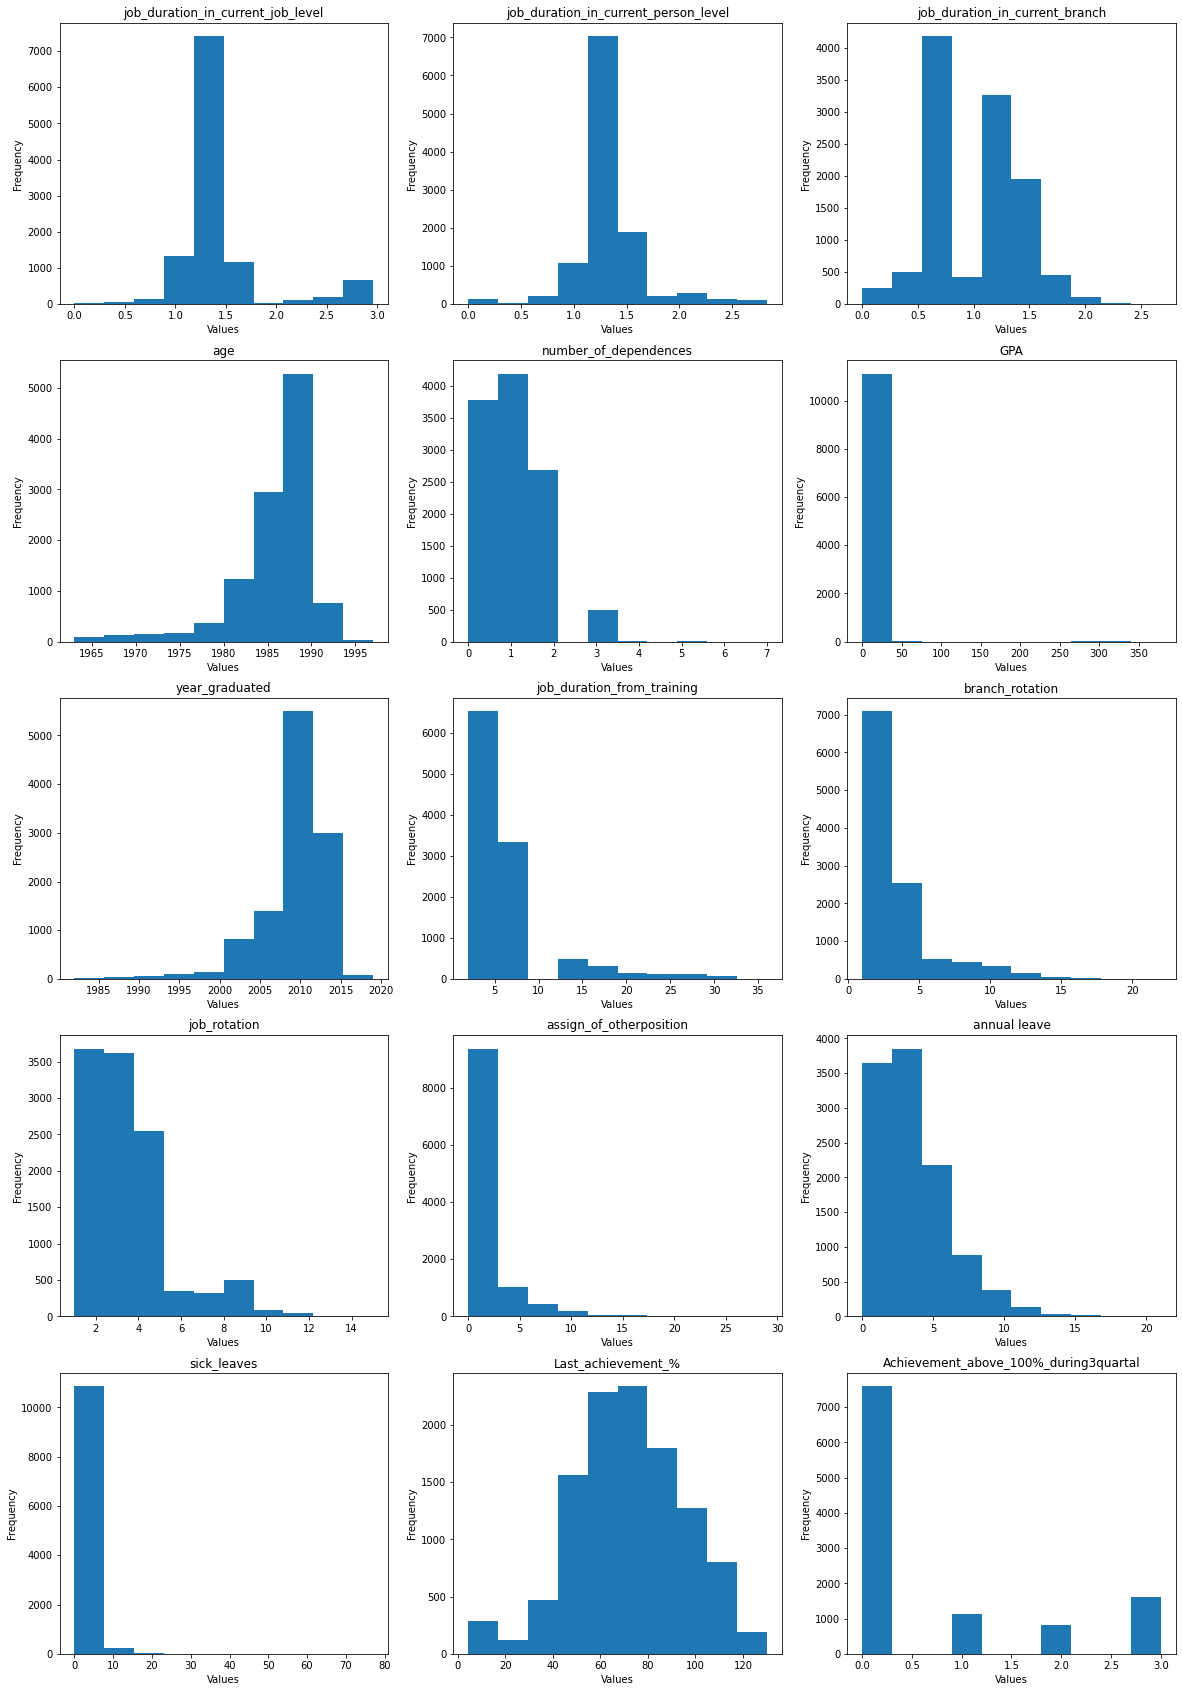

In [10]:
# focus only on numerical features
str_feats = ['job_level', 'person_level', 'Employee_type', 'marital_status_maried(Y/N)', 'Education_level', 'gender'] # string features
non_str = [x for x in df.columns if x not in str_feats and x != 'Best Performance']

fig, axs = plt.subplots(5, 3, figsize=(20, 30))
axs = axs.ravel()

for i in range(len(axs)):
    axs[i].hist(df[non_str[i]])
    axs[i].set_title(non_str[i])
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

From the histograms shown above, outliers are observed at ``number_of_dependences``, ``annual leave``, ``sick_leaves``, ``assign_of_otherposition``, and ``GPA``. They will be treated as following:

**number_of_dependences**  
This feature is assumed to represent the number of children an employee has.
Having four children is considered to be the maximum number of children nowadays, thus for any value of this feature larger than 4 ``(>4)``, it will be clipped to 4. 

Also notice from the value counts, the number of employees with more than 4 dependences is very small, therefore, clipping a few entries should not affect the dataset badly.

In [11]:
df['number_of_dependences'].value_counts()

1    4185
0    3778
2    2674
3     497
4      13
5       4
7       1
Name: number_of_dependences, dtype: int64

In [12]:
df['number_of_dependences'].loc[df['number_of_dependences'] > 4] = 4

c:\users\roby koeswojo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**annual leave**  
A common annual leaves given by companies in Indonesia is 12 days. Thus, any value larger than 12 ``(> 12)`` is **clipped to 12**.

In [13]:
df['annual leave'].value_counts()

3     2698
2     1497
0     1447
5     1333
4     1154
6      847
1      704
7      479
8      405
9      240
10     146
11      77
12      64
13      25
14      14
15      10
16       5
18       4
20       1
21       1
19       1
Name: annual leave, dtype: int64

In [14]:
df['annual leave'].loc[df['annual leave'] > 12] = 12

c:\users\roby koeswojo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**sick_leaves**  
As far as I know, there is no limit for sick leaves. However, considering that the effective working days in a month is 20 days (4 weeks x 5 days), thus any ``sick_leaves`` value larger than 20 ``(>20)`` is categorized as a special case, and **limitted to 20**

In [15]:
df['sick_leaves'].value_counts()

0     7196
1     1496
2      958
3      499
4      286
5      193
6      139
7       99
8       64
10      42
9       41
11      28
12      22
13      16
15      11
14      10
16       9
20       6
17       5
21       4
23       3
19       3
28       2
29       2
37       2
22       2
30       2
27       1
47       1
36       1
26       1
18       1
53       1
25       1
77       1
32       1
46       1
31       1
55       1
Name: sick_leaves, dtype: int64

In [16]:
df['sick_leaves'].loc[df['sick_leaves'] > 20] = 20

c:\users\roby koeswojo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**assign_of_otherposition**  
Only a small number of employees has been assigned to other position frequently.  
From the value counts below, it seems that only a bunch of employees has been assigned more than 15 times to other positions. 15 is set as the maximum number for this feature.

In [17]:
# assign of other position
df['assign_of_otherposition'].value_counts()

0     7302
1     1385
2      684
3      476
4      309
5      250
6      190
7      145
8      102
9       82
10      47
11      47
12      25
14      22
13      17
15      16
16      13
17      12
19       8
18       7
22       5
20       3
21       2
27       1
29       1
24       1
Name: assign_of_otherposition, dtype: int64

In [18]:
df['assign_of_otherposition'].loc[df['assign_of_otherposition'] > 15] = 15

c:\users\roby koeswojo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**GPA**  
There are several employees noted with GPA larger than 4.0 ``(>4.0)``. Following the standard GPA range values (0 - 4.0), any GPA value larger than 4.0 is **clipped to 4.0**.

In [19]:
df['GPA'].value_counts()

0.00     2148
3.00      382
3.01      229
3.10      199
3.03      186
         ... 
75.00       1
2.31        1
2.54        1
22.00       1
2.10        1
Name: GPA, Length: 216, dtype: int64

In [20]:
df['GPA'].loc[df['GPA'] > 4.0] = 4.0

c:\users\roby koeswojo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**age**, **year_graduated**

Modification on ``age`` and ``year_graduated`` is performed.
- The original ``age`` feature shows employees' year of birth, although the name of the feature is ``age``. Thus, to match the name of the feature, the values are changed.
- ``year_graduated`` also shows the year when an employee starts to work. In order to match the range of values of ``age``, the values of this feature are also modified to represent the duration an employee has worked.

In [21]:
df['age'] = 2021 - df['age']
df['working_duration'] = 2021 - df['year_graduated']
df.drop(labels='year_graduated', axis=1, inplace=True)

## 3 Correlation check

<AxesSubplot:>

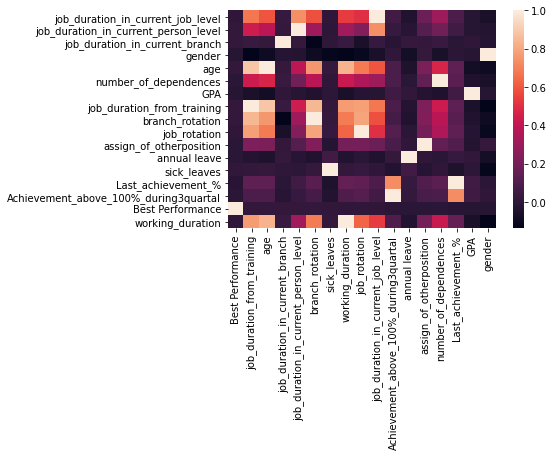

In [22]:
import seaborn as sns

sns.heatmap(df.corr().sort_values('Best Performance', ascending=False).transpose())

Quick glance at the heatmap above tells that no feature is highly correlated to the target variable ``Best Performance``.  
Let's see the correlation matrix to see in detail:

In [23]:
df.corr().sort_values('Best Performance', ascending=False).transpose()

,Best Performance,job_duration_from_training,age,job_duration_in_current_branch,job_duration_in_current_person_level,branch_rotation,sick_leaves,working_duration,job_rotation,job_duration_in_current_job_level,Achievement_above_100%_during3quartal,annual leave,assign_of_otherposition,number_of_dependences,Last_achievement_%,GPA,gender
job_duration_in_current_job_level,0.006956,0.679284,0.596042,0.028188,0.736834,0.585003,0.007006,0.537754,0.505521,1.000000,0.061873,-0.037568,0.178666,0.304810,0.093502,-0.020091,-0.057609
job_duration_in_current_person_level,0.016152,0.441081,0.395349,0.022649,1.000000,0.313993,0.001147,0.317804,0.237237,0.736834,0.025667,-0.014498,0.113230,0.196075,0.055478,-0.019667,-0.024712
job_duration_in_current_branch,0.017272,0.037371,0.023744,1.000000,0.022649,-0.127912,0.004874,0.033393,-0.057724,0.028188,-0.013654,0.020097,0.017019,0.033101,-0.007679,0.009644,-0.021901
gender,-0.019112,-0.135502,-0.091766,-0.021901,-0.024712,-0.091795,-0.118318,-0.129231,-0.112925,-0.057609,0.007694,-0.075182,0.021827,-0.057374,-0.005576,-0.018417,1.000000
age,0.018957,0.885136,1.000000,0.023744,0.395349,0.757699,0.023899,0.833897,0.683579,0.596042,0.088387,-0.045123,0.220293,0.475973,0.142681,-0.078682,-0.091766
number_of_dependences,-0.010034,0.432856,0.475973,0.033101,0.196075,0.385681,0.008020,0.427276,0.355636,0.304810,0.086675,-0.010784,0.150665,1.000000,0.133198,-0.040173,-0.057374
GPA,-0.017514,-0.053815,-0.078682,0.009644,-0.019667,-0.036544,0.000135,-0.058717,-0.023383,-0.020091,0.052884,0.012764,-0.027877,-0.040173,0.056171,1.000000,-0.018417
job_duration_from_training,0.019219,1.000000,0.885136,0.037371,0.441081,0.848069,0.016256,0.769680,0.779423,0.679284,0.091092,-0.028238,0.226892,0.432856,0.140839,-0.053815,-0.135502
branch_rotation,0.016067,0.848069,0.757699,-0.127912,0.313993,1.000000,0.020998,0.687912,0.792472,0.585003,0.070964,-0.034372,0.234212,0.385681,0.121915,-0.036544,-0.091795
job_rotation,0.007721,0.779423,0.683579,-0.057724,0.237237,0.792472,0.025139,0.631226,1.000000,0.505521,0.113158,-0.008574,0.202717,0.355636,0.145993,-0.023383,-0.112925


Notice from above correlation matrix, it shows that no feature is highly correlated (i.e. with correlation value > 0.7) to the target ``Best Performance``.  

## 4 Data preparation

In [24]:
y = df.pop('Best Performance')
X = df
print('Shape of X is: {}, shape of y is {}'.format(X.shape, y.shape))

Shape of X is: (11152, 21), shape of y is (11152,)


In [25]:
# define categorical and numerical features
num_feats = ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'working_duration']
cat_feats = [x for x in X if x not in num_feats]

X = pd.get_dummies(X, columns=cat_feats, drop_first=True)
X.head(2)

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,...,marital_status_maried(Y/N)_Y,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5
0,1.352775,1.352775,1.732051,36,2.86,4,2,3,2,3,...,1,1,0,0,0,0,0,0,0,0
1,1.292285,1.292285,1.039230,32,4.00,4,4,3,0,0,...,1,0,0,0,0,1,0,0,0,0


In [26]:
print('Total number of features becomes: {}'.format(X.shape[1]))

Total number of features becomes: 36


## 5 Modeling and evaluation  
The models shown in this notebook are:
- Random forest classifier,
- XGBoost classifier.  
(Other models, e.g. SVM, logistic regression, MLP network, have been tested but not shown here because their performances are not as good as random forest and XGBoost classifier shown here).

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [28]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = [RandomForestClassifier(random_state=42), XGBClassifier(random_state=42)]

params = [{'n_estimators':[10, 30, 50, 100], 'criterion':['gini', 'entropy'], 'max_depth':[5, 7, 10]}, 
          {'max_depth': [2, 3, 4, 5], 'learning_rate': [0.01, 0.03, 0.1, 0.3, 1], 'n_estimators': [10, 30, 100, 300]}]

In [29]:
for model, param_grid in zip(models, params):
    print('MODEL: ', model)
    print('Parameters: ', param_grid)
    search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=folds)
    search.fit(X, y)
    print('Best score: {}'.format(search.best_score_))
    print('Best parameters: {}'.format(search.best_params_))

MODEL:  RandomForestClassifier(random_state=42)
Parameters:  {'n_estimators': [10, 30, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 7, 10]}
Best score: 0.5812333899346939
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
MODEL:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Parameters:  {'max_depth': [2, 3, 4, 5], 'learning_rate': [0.01, 0.03, 0.1, 0.3, 1], 'n_estimato

[15:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

The ROC-AUC score of the random forest classifier is 0.58, whereas the ROC-AUC score of the XGBoost classifier is 0.57.  
The performance of these two classifiers is comparable -- Focus on **random forest classifier**

### 5.1 Oversampling  
Common technique used to address imbalanced dataset is oversampling. The tehcnique used: **SMOTE** (Synthetic Minority Oversampling Technique) and its variants

In [31]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [32]:
overs = [SMOTE(), BorderlineSMOTE(), SVMSMOTE(), ADASYN()]

for i, over in enumerate(overs):
    model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)
    steps = [('over', over), ('model', model)]
    pipeline = Pipeline(steps=steps)

    print('################### Method {} ###################'.format(i+1))
    print(over)
    scores = cross_val_score(pipeline, X.values, y.values, scoring='roc_auc', cv=folds, n_jobs=-1)
    print('Mean ROC AUC: %.3f' % np.mean(scores))
    print()

################### Method 1 ###################
SMOTE()
Mean ROC AUC: 0.553

################### Method 2 ###################
BorderlineSMOTE()
Mean ROC AUC: 0.550

################### Method 3 ###################
SVMSMOTE()
Mean ROC AUC: 0.555

################### Method 4 ###################
ADASYN()
Mean ROC AUC: 0.546



- Oversampling techniques seem to not working as the ROC-AUC scores generated from various oversampling techniques are lower than without using oversampling technique.  
- The highest ROC-AUC score, however, is obtained when using either *SMOTE* or *SVMSMOTE*, i.e. ROC-AUC score of 0.555.

### 5.2 Oversampling and undersampling  
According to [Chawla, et.al (2002)](https://arxiv.org/abs/1106.1813), it is suggested to combine *SMOTE* with undersampling.  

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [34]:
# manual combination of over and undersampling
model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X.values, y.values, scoring='roc_auc', cv=folds, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.564


**SMOTEEN, SMOTETomek**

The *imblearn* library also provides two techniques that combine over and undersampling

In [35]:
combinations = [SMOTEENN(sampling_strategy=0.2, random_state=42), SMOTETomek(sampling_strategy=0.2, random_state=42)]

for combination in combinations:
    model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)
    steps = [('comb', combination),
            ('model', model)]

    pipeline = Pipeline(steps=steps)

    scores = cross_val_score(pipeline, X.values, y.values, scoring='roc_auc', cv=folds, n_jobs=-1)
    print(combination, ' ROC: ', np.mean(scores))

SMOTEENN(random_state=42, sampling_strategy=0.2)  ROC:  0.5168499978893545
SMOTETomek(random_state=42, sampling_strategy=0.2)  ROC:  0.56183324814321


Results:
- Using *SMOTE* + *RandomUnderSampler* gives higher *ROC-AUC* score compared to only use single oversampling method.
- The baseline *ROC-AUC* score obtained by random forest classifier is **0.58**, and none of the scores from the oversampling and undersampling techniques can surpass this baseline performance.

### 5.3 Dimensionality reduction  
Another idea implemented is to use dimensionality reduction, i.e. a technique that projects each data point to lower dimension while preserving the variance of the data.  
*PCA* (Principal Component Analysis) is one of the dimensionality reduction techniques that are typically applied for numerical data. However, since this dataset consists of numerical and categorical data (mix type), then using **Factor Analysis of Mixed Data (FAMD)** makes more sense in this case.

In [36]:
from prince import FAMD

In [37]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_components = [3, 5, 10, 12, 15, 18, 20] # desired number of final features

for n in n_components:
    print('############# n: {} #############'.format(n))
    famd = FAMD(n_components=n)
    model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)
    X_famd = famd.fit_transform(df)
    print(X_famd.shape)

    scores = cross_val_score(model, X_famd, y, scoring='roc_auc', cv=folds, n_jobs=-1)
    print('Mean ROC AUC: %.3f' % np.mean(scores))

############# n: 3 #############
(11152, 3)
Mean ROC AUC: 0.513
############# n: 5 #############
(11152, 5)
Mean ROC AUC: 0.502
############# n: 10 #############
(11152, 10)
Mean ROC AUC: 0.519
############# n: 12 #############
(11152, 12)
Mean ROC AUC: 0.515
############# n: 15 #############
(11152, 15)
Mean ROC AUC: 0.523
############# n: 18 #############
(11152, 18)
Mean ROC AUC: 0.555
############# n: 20 #############
(11152, 20)
Mean ROC AUC: 0.547


Implementing FAMD on standard dataset has been tested, but to no avail. Next, we can try combining the idea of **FAMD** with **over-undersampling**.

In [38]:
famd = FAMD(n_components=18)
X_famd = famd.fit_transform(df)
print(X_famd.shape)

model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)
over = SMOTE(sampling_strategy=0.2)
#under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_famd.values, y.values, scoring='roc_auc', cv=folds, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

(11152, 18)
Mean ROC AUC: 0.546


The *ROC AUC* score obtained by training the model on the feature engineered- dataset, i.e. **0.54**, is lower than the baseline *ROC AUC* score, i.e. **0.58**.

### 5.4 Hyperparameters tuning  
We have seen that trying to improve the *ROC-AUC* score by means of the model's paramaters (through training the models on sampled dataset and feature engineered-dataset) is not successful. The only way left to explore is by means of hyperparameters tuning. 

In [39]:
params = {'min_samples_split': [1, 3, 5, 10],
          'max_leaf_nodes': [1, 3, 5, 10],
          'min_samples_leaf': [1, 3, 5, 10],
          'bootstrap': [False, True],
          'max_features': ['sqrt', 'log2', None],
          'class_weight': ['balanced', 'balanced_subsample', None],
          }

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, random_state=42)

search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=folds)
search.fit(X.values, y.values)
print('Best score: {}'.format(search.best_score_))
print('Best parameters: {}'.format(search.best_params_))

Best score: 0.5828515975901563
Best parameters: {'bootstrap': True, 'class_weight': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}


Finetuning the random forest classifier also does not improve the ROC AUC score as the score is same as the baseline score. The hyperparameters found above are used to perform the final classification on the test set.

## 6 Prediction (classification) 
Using best model found from above steps, the best model predicts the test set. Similar treatment (process) is applied to the test set.

In [40]:
test_df = pd.read_csv('data/test.csv')
test_df.head(2)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0


In [41]:
print('Shape of the test dataset is {}'.format(test_df.shape))

Shape of the test dataset is (6000, 21)


In [42]:
# check nulls
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   gender                                 6000 non-null   int64  
 7   age                                    6000 non-null   int64  
 8   marital_status_maried(Y/N)             6000 non-null   object 
 9   number_of_dependences                  6000 non-null   int64  
 10  Education_level                        6000 non-null   object 
 11  GPA 

In [43]:
# preprocess using same preprocessing steps in training set
test_df['number_of_dependences'].loc[test_df['number_of_dependences'] > 4] = 4
test_df['annual leave'].loc[test_df['annual leave'] > 12] = 12
test_df['sick_leaves'].loc[test_df['sick_leaves'] > 20] = 20
test_df['assign_of_otherposition'].loc[test_df['assign_of_otherposition'] > 15] = 15
test_df['GPA'].loc[test_df['GPA'] > 4.0] = 4.0

test_df['age'] = 2021 - test_df['age']
test_df['working_duration'] = 2021 - test_df['year_graduated']
test_df.drop(labels='year_graduated', axis=1, inplace=True)
X_test = test_df

In [44]:
# define categorical and numerical features
num_feats = ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'working_duration']
cat_feats = [x for x in X_test if x not in num_feats]

X_test = pd.get_dummies(X_test, columns=cat_feats, drop_first=True)
X_test.head(2)

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,...,marital_status_maried(Y/N)_Y,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5
0,1.256981,1.256981,0.707107,33,3.08,6,4,2,6,3,...,0,0,0,0,0,0,0,1,0,0
1,1.224745,1.224745,1.256981,30,3.31,2,2,2,0,1,...,0,0,0,0,0,0,0,0,1,0


In [45]:
# fitting and predicting
model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, 
                               class_weight='balanced', max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=3)

model.fit(X, y)
y_pred = model.predict_proba(X_test.values)[:, 1]


Just to see how many classes predicted:

In [46]:
from collections import Counter
b = model.predict(X_test.values)
print(Counter(b))

Counter({0: 4026, 1: 1974})


In [ ]:
# submit
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

In [ ]:
submission['Best Performance'] = y_pred
submission.to_csv("data/submission.csv", index=False)

## 7 Summary and Recommendation  
1. The model used as the baseline model is Random Forest Classifier, and it turns out to produce the best ROC-AUC score.

2. The method used in this notebook focuses on addressing the unbalanced dataset, i.e. employing oversampling and undersampling techniques, and using dimensionality reduction to reduce the number features, but to no avail.

3. Room for improvement is still available, for example, applying feature engineering, such as modifying the skewness detected in some features' distribution. Secondly, analysing the categorical features is also worth to be tested (since only the numerical features are analysed here).

**RESULT** at kaggle:  
With this notebook, my position is 160 / 624 (= top 26%)